In [196]:
# import the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [197]:
# Create the data for donut

N=1000
D=2


Rinner = 5
Router = 10

# Defining the inner circle

Radius_inner = np.random.randn(N/2) + Rinner
theta_inner = 2*np.pi*np.random.random(N/2)
Xinner = np.concatenate([[Radius_inner*np.cos(theta_inner)],[Radius_inner*np.sin(theta_inner)]]).T

# Defining the outer circle
Radius_outer = np.random.randn(N/2) + Router
theta_outer = 2*np.pi*np.random.random(N/2)
Xouter = np.concatenate([[Radius_outer*np.cos(theta_outer)],[Radius_outer*np.sin(theta_outer)]]).T

X= np.concatenate([Xinner,Xouter])
T = np.array([0]*int(N/2)+ [1]*int(N/2))


/Users/sunpreet/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/sunpreet/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/sunpreet/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/sunpreet/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [198]:
Xinner.shape


(500, 2)

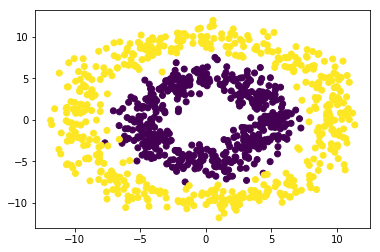

In [199]:
plt.scatter(X[:,0,],X[:,1],c=T)

In [200]:
# To classify this we would need feature extraction
r = np.zeros((N,1))
for i in np.arange(N):
    r[i]= np.sqrt(np.dot(X[i,:],X[i,:]))

In [201]:
# Creating the input dataset
one = np.ones((N,1))

Xinput = np.concatenate([one,r,X],axis=1)
Xinput

array([[  1.        ,   5.67185274,   3.26189787,  -4.64003619],
       [  1.        ,   3.34807958,  -1.11503199,   3.15695115],
       [  1.        ,   5.7268445 ,  -5.72679277,   0.02434201],
       ..., 
       [  1.        ,  11.27723886,   9.76802242,   5.63576564],
       [  1.        ,   8.6611143 ,   8.61287991,  -0.91279826],
       [  1.        ,   8.57457577,  -5.44921565,   6.62037752]])

In [202]:
# Creating the sigmoid and cross entropy function

def sigmoid(z):
    return 1/(1+ np.exp(-z))

def cross_entropy1(T,Y):
    return -np.mean((1-T)*np.log(1-Y)+T*np.log(Y))

def cross_entropy(T,Y):
    E=0
    for i in np.arange(N):
        if T[i]==1:
            E-=np.log(Y[i])
        else:
            E-=np.log(1-Y[i])
    return E

In [203]:
# Initializing the weights randomly
w=np.random.randn(D+2)
z=Xinput.dot(w)
Y=sigmoid(z)

5.37782223822
0.422699692717
0.342457847968
0.288765503594
0.250771320156
0.222614210804
0.200957089053
0.183793249771
0.169855008119
0.158306601764
0.148576500655
0.140261425054
0.13306903232
0.126782386196
0.121237188789
0.116306757934
0.111891854761
0.107913634698
0.104308660975
0.10102531114
0.098021143691
0.0952609388273
0.0927152204614
0.0903591271348
0.0881715394382
0.0861343984535
0.0842321681493
0.0824514074577
0.0807804267729
0.0792090100467
0.0777281883061
0.0763300538114
0.0750076065858
0.0737546269123
0.0725655688072
0.0714354705426
0.0703598791134
0.0693347861713
0.0683565734417
0.0674219660216
0.0665279922586
0.0656719491522
0.0648513724076
0.0640640104262
0.0633078016412
0.0625808547043
0.0618814311135
0.0612079299367
0.0605588743406
0.0599328996811
Final W: [-11.91664848   1.61124585  -0.02063205   0.02360498]
Final Classification rate= 0.992


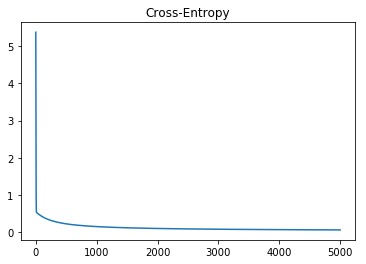

In [204]:
# Use Gradient Descent to solve
error=[]
learning=0.0001
for i in np.arange(5000):
    e=cross_entropy1(T,Y)
    error.append(e)
    if i%100==0:
        print(e)
    w+=learning*(np.dot((T-Y).T,Xinput)-0.01*w)
    Y=sigmoid(Xinput.dot(w))
plt.plot(error)
plt.title("Cross-Entropy")

print("Final W:",w)
print ("Final Classification rate=",np.mean(T==np.round(Y)))
                       
    